# 설정

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)

def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action = "ignore", message = "^internal gelsd")

# 2.3 데이터 가져오기

## 2.3.2 데이터 다운로드

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

## 2.3.3 데이터 구조 훑어보기

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing['total_bedrooms'].count()

20433

그림 저장: attribute_histogram_plots


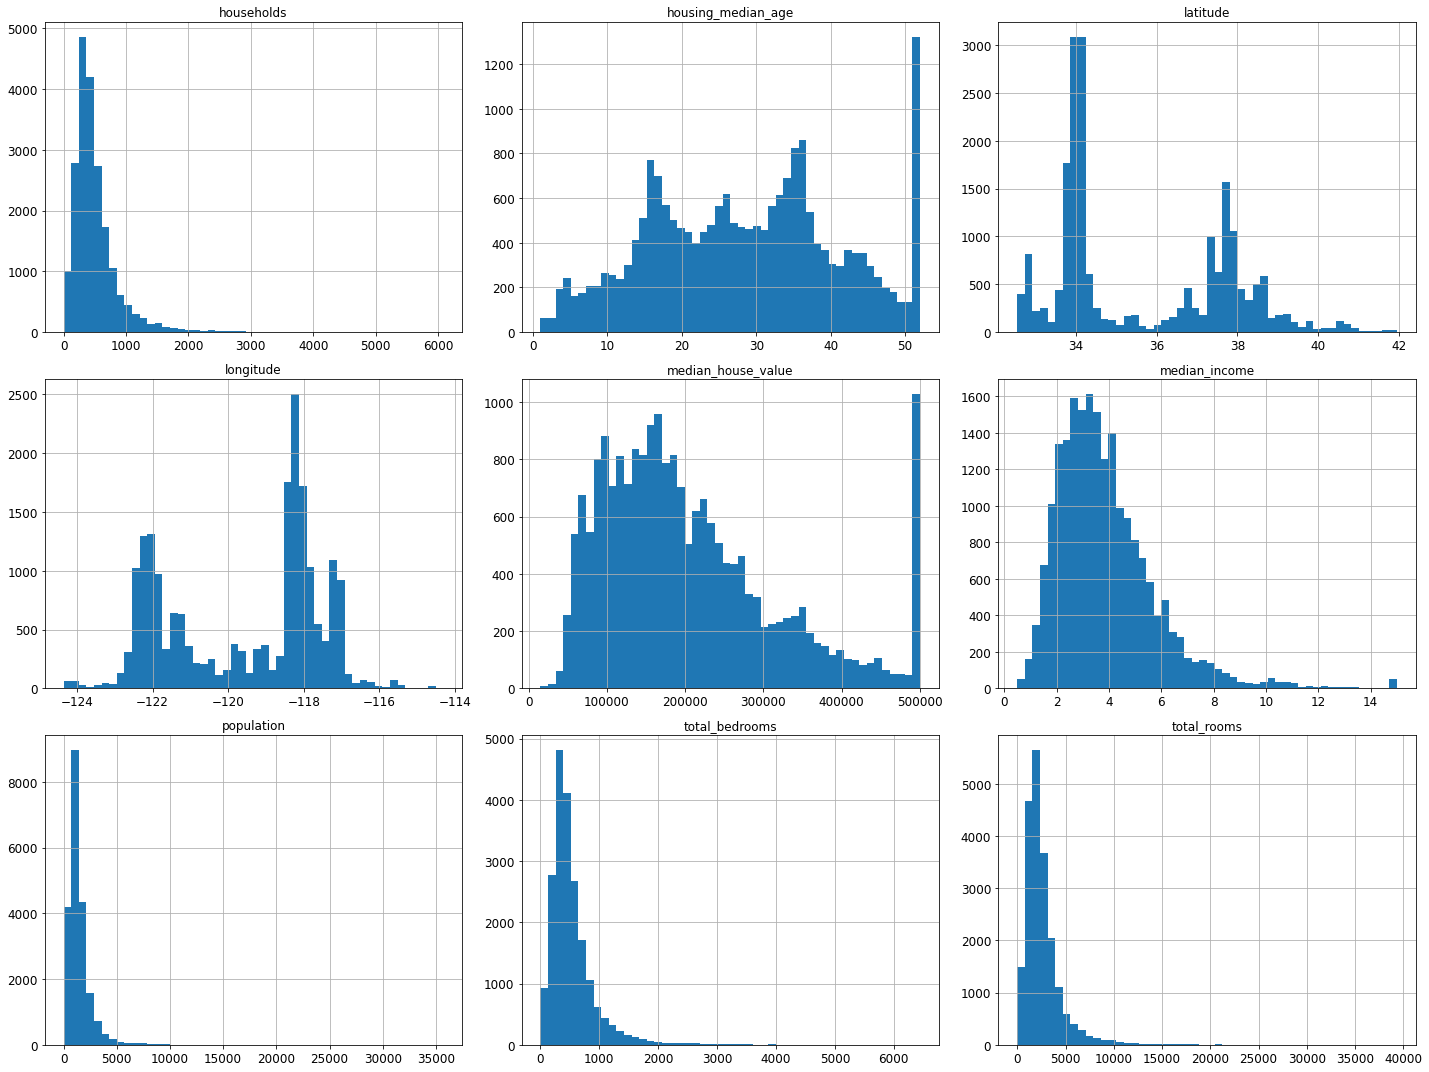

In [12]:
housing.hist(bins = 50, figsize = (20, 15))
save_fig('attribute_histogram_plots')
plt.show()

In [13]:
# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

## 2.3.4 테스트 세트 만들기

In [14]:
# 예시로 만든 것, 실전에서는 sklearn의 train_test_split() 사용할 것
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [16]:
len(test_set)

4128

In [17]:
from zlib import crc32

In [18]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

In [19]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
import hashlib

def test_set_check(identifier, test_ratio, hash = hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [21]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [22]:
housing_with_id = housing.reset_index() # 'index'열이 추가된 데이터프레임 반환
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20634,20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [24]:
len(train_set)

16362

In [25]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20619,20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND
20625,20625,-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.1250,72000.0,INLAND
20632,20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND


In [26]:
len(test_set)

4278

In [27]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20634,20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND,-121520.73
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [30]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


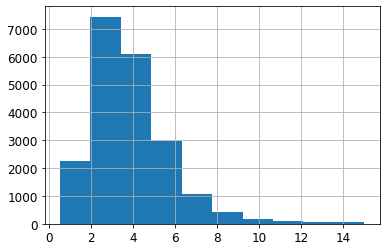

In [31]:
housing['median_income'].hist()

In [32]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])

In [33]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

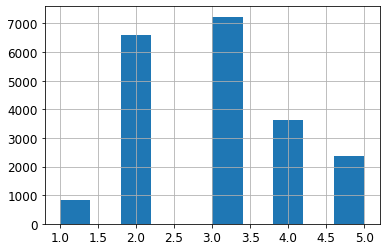

In [34]:
housing['income_cat'].hist()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 52)

for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [36]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

## 추가된 내용

In [37]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [38]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [39]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [40]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# 2.4 데이터 이해를 위한 탐색과 시각화

In [41]:
housing = strat_train_set.copy()

## 2.4.1 지리적 데이터 시각화

그림 저장: bad_visualization_plot


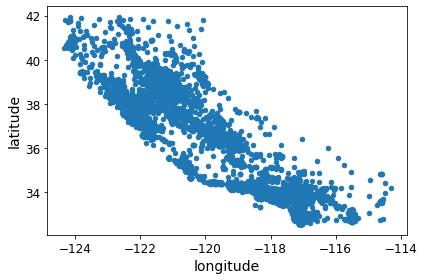

In [42]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
save_fig("bad_visualization_plot")

그림 저장: better_visualization_plot


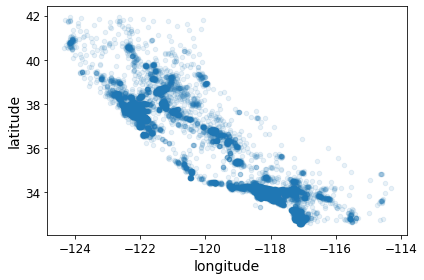

In [43]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
save_fig("better_visualization_plot")

그림 저장: housing_prices_scatterplot


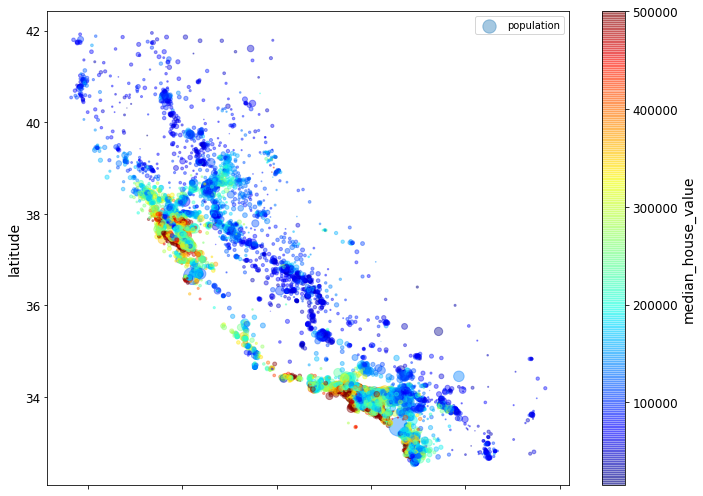

In [44]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
             s = housing['population'] / 100, label = 'population', 
             figsize = (10, 7), c = 'median_house_value', cmap = plt.get_cmap('jet'), 
             colorbar = True)
plt.legend()
save_fig("housing_prices_scatterplot")

## 추가된 내용

In [45]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok = True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1521eb078d0>)

그림 저장: california_housing_prices_plot


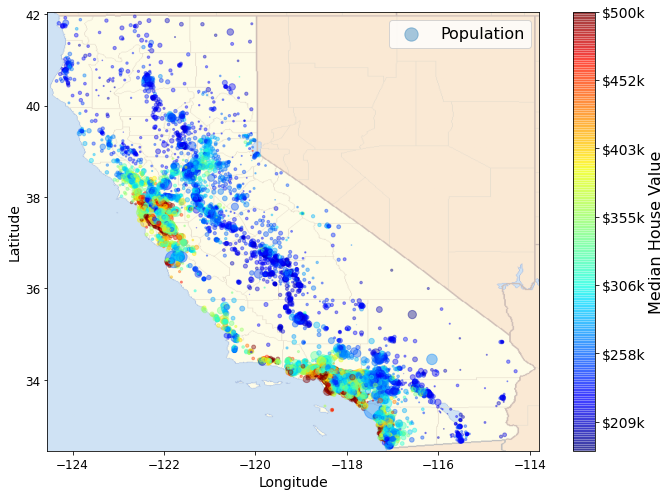

In [46]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x = "longitude", y = "latitude", figsize = (10,7),
                       s = housing['population'] / 100, label = "Population",
                       c = "median_house_value", cmap = plt.get_cmap("jet"),
                       colorbar = False, alpha = 0.4,
                      )
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
           cmap = plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks = tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v / 1000)) for v in tick_values], 
                        fontsize = 14)
cbar.set_label('Median House Value', fontsize = 16)

plt.legend(fontsize = 16)
save_fig("california_housing_prices_plot")
plt.show()

## 책에 있는 내용

In [47]:
corr_matrix = housing.corr()

In [48]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687934
total_rooms           0.131950
housing_median_age    0.102662
households            0.063762
total_bedrooms        0.046469
population           -0.025019
longitude            -0.051144
latitude             -0.138525
Name: median_house_value, dtype: float64

## 2.4.2 상관관계 조사

그림 저장: scatter_matrix_plot


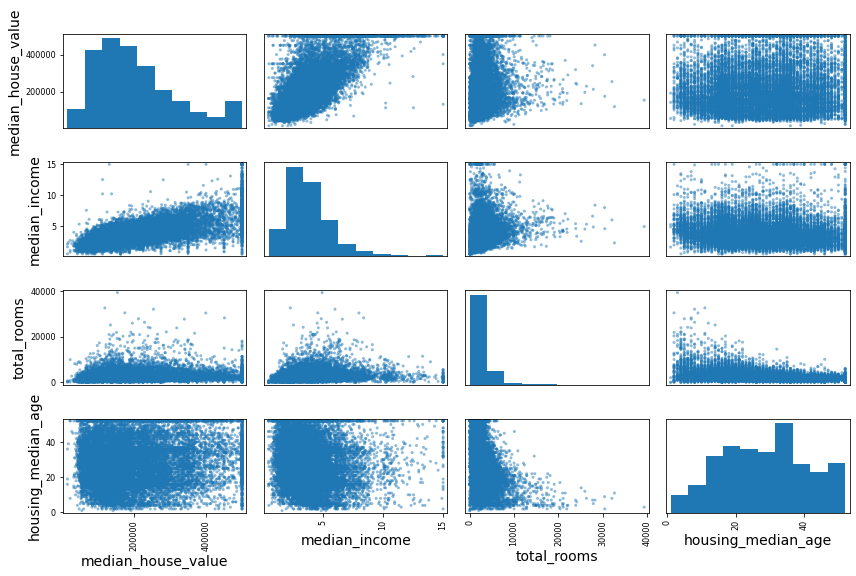

In [49]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 
              'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))
save_fig("scatter_matrix_plot")

그림 저장: income_vs_house_value_scatterplot


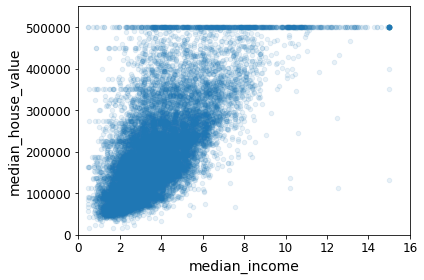

In [50]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', 
             alpha = 0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## 2.4.3 특성 조합으로 실험

In [51]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

## 추가된 내용 

In [52]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687934
rooms_per_household         0.151217
total_rooms                 0.131950
housing_median_age          0.102662
households                  0.063762
total_bedrooms              0.046469
population_per_household   -0.021644
population                 -0.025019
longitude                  -0.051144
latitude                   -0.138525
bedrooms_per_room          -0.257517
Name: median_house_value, dtype: float64

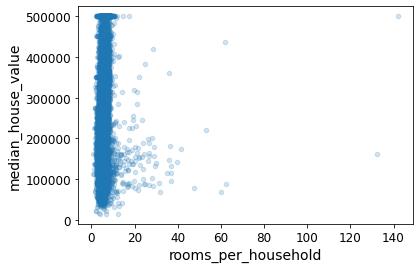

In [53]:
housing.plot(kind = "scatter", x = "rooms_per_household", y = "median_house_value",
             alpha = 0.2)
plt.show()

In [54]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000
mean,-119.561352,35.618750,28.655099,2645.057837,540.450746,1429.414971,501.301659,3.875829,207248.908370,5.427057,0.213113,3.098868
std,2.003711,2.128109,12.553231,2196.876260,426.806168,1144.995172,385.680826,1.911363,115564.728378,2.535880,0.057744,11.586422
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1450.000000,297.000000,792.000000,281.000000,2.565425,120100.000000,4.442464,0.175424,2.428016
50%,-118.480000,34.250000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.540300,180200.000000,5.224218,0.203384,2.817472
75%,-118.000000,37.700000,37.000000,3156.000000,648.000000,1727.000000,606.000000,4.739600,265000.000000,6.042284,0.239859,3.279600
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [55]:
# 훈련 세트를 위해 레이블 삭제
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [56]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16104,-122.50,37.75,45.0,1620.0,NaN,941.0,328.0,4.3859,NEAR OCEAN
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN
7654,-118.26,33.83,24.0,3059.0,NaN,2064.0,629.0,3.5518,<1H OCEAN
4600,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,<1H OCEAN
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,<1H OCEAN


## 2.5.1 데이터 정제

In [57]:
sample_incomplete_rows.dropna(subset = ['total_bedrooms']) # 옵션 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [58]:
sample_incomplete_rows.drop('total_bedrooms', axis = 1) # 옵션 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16104,-122.50,37.75,45.0,1620.0,941.0,328.0,4.3859,NEAR OCEAN
16105,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,NEAR OCEAN
7654,-118.26,33.83,24.0,3059.0,2064.0,629.0,3.5518,<1H OCEAN
4600,-118.27,34.04,13.0,1784.0,2158.0,682.0,1.7038,<1H OCEAN
5723,-118.23,34.18,45.0,2332.0,943.0,339.0,8.1132,<1H OCEAN


In [59]:
median = housing['total_bedrooms'].median() # 옵션 3
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace = True)

In [60]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16104,-122.50,37.75,45.0,1620.0,435.0,941.0,328.0,4.3859,NEAR OCEAN
16105,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,NEAR OCEAN
7654,-118.26,33.83,24.0,3059.0,435.0,2064.0,629.0,3.5518,<1H OCEAN
4600,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,<1H OCEAN
5723,-118.23,34.18,45.0,2332.0,435.0,943.0,339.0,8.1132,<1H OCEAN


In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [62]:
housing_num = housing.drop('ocean_proximity', axis = 1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

In [63]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [64]:
imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5403])

In [65]:
housing_num.median().values

array([-118.48  ,   34.25  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5403])

In [66]:
X = imputer.transform(housing_num)

In [67]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [68]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16104,-122.50,37.75,45.0,1620.0,435.0,941.0,328.0,4.3859
16105,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919
7654,-118.26,33.83,24.0,3059.0,435.0,2064.0,629.0,3.5518
4600,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038
5723,-118.23,34.18,45.0,2332.0,435.0,943.0,339.0,8.1132


In [69]:
imputer.strategy

'median'

In [70]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5864,-118.34,34.18,45.0,3046.0,633.0,1448.0,599.0,3.2400
4350,-118.37,34.11,42.0,5518.0,979.0,1863.0,957.0,8.5842
10745,-117.91,33.61,36.0,3082.0,455.0,771.0,365.0,11.2160
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355
7169,-118.18,34.06,33.0,278.0,71.0,266.0,56.0,0.8941


## 2.5.2 텍스트와 범주형 특성 다루기

In [71]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
5864,<1H OCEAN
4350,<1H OCEAN
10745,<1H OCEAN
618,NEAR BAY
7169,<1H OCEAN
19445,INLAND
9897,NEAR BAY
18247,NEAR BAY
432,NEAR BAY
8776,<1H OCEAN


In [72]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [0.]])

In [73]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [74]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [75]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## 추가된 내용

In [76]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [77]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 2.5.3 나만의 변환기

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args나 **kargs가 아니다.
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self # 더 할 일이 없다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, households_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [79]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [80]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns) + ['rooms_per_household', 
                                       'population_per_household'], 
    index = housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
5864,-118.34,34.18,45,3046,633,1448,599,3.24,<1H OCEAN,5.08514,2.41736
4350,-118.37,34.11,42,5518,979,1863,957,8.5842,<1H OCEAN,5.76594,1.94671
10745,-117.91,33.61,36,3082,455,771,365,11.216,<1H OCEAN,8.44384,2.11233
618,-122.15,37.73,45,3758,819,1573,736,2.8355,NEAR BAY,5.10598,2.13723
7169,-118.18,34.06,33,278,71,266,56,0.8941,<1H OCEAN,4.96429,4.75


## 2.5.4 특성 스케일링

## 2.5.5 변환 파이프라인

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [82]:
housing_num_tr

array([[ 0.6095637 , -0.67609026,  1.30208678, ..., -0.13483487,
        -0.05882111, -0.08571709],
       [ 0.59459102, -0.70898432,  1.06309724, ...,  0.13363754,
        -0.09944349, -0.15231905],
       [ 0.82417203, -0.94394184,  0.58511815, ...,  1.18967375,
        -0.08514871,  0.28860794],
       ...,
       [ 0.59459102, -0.71838262, -0.53016638, ..., -0.70870714,
        -0.13718767, -0.05775542],
       [-0.91764908,  1.36804016,  0.74444452, ..., -0.42755658,
        -0.10717394, -0.47937688],
       [-1.44169268,  1.00150643,  0.50545497, ..., -0.35445073,
         0.24466335, -0.1911021 ]])

In [83]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [84]:
housing_prepared

array([[ 0.6095637 , -0.67609026,  1.30208678, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59459102, -0.70898432,  1.06309724, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82417203, -0.94394184,  0.58511815, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.59459102, -0.71838262, -0.53016638, ...,  0.        ,
         0.        ,  0.        ],
       [-0.91764908,  1.36804016,  0.74444452, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44169268,  1.00150643,  0.50545497, ...,  0.        ,
         1.        ,  0.        ]])

In [85]:
housing_prepared.shape

(16512, 16)

## 추가된 내용

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [87]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [88]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [89]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 0.6095637 , -0.67609026,  1.30208678, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59459102, -0.70898432,  1.06309724, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82417203, -0.94394184,  0.58511815, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.59459102, -0.71838262, -0.53016638, ...,  0.        ,
         0.        ,  0.        ],
       [-0.91764908,  1.36804016,  0.74444452, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44169268,  1.00150643,  0.50545497, ...,  0.        ,
         1.        ,  0.        ]])

In [90]:
np.allclose(housing_prepared, old_housing_prepared)

True

# 2.6 모델 선택과 훈련

## 2.6.1 훈련 세트에서 훈련하고 평가하기

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
housing_labels.dropna(inplace = True)
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('예측 : ', lin_reg.predict(some_data_prepared))

예측 :  [227417.54006953 458791.05042833 524460.24770834 233403.44315777
 102215.37628904]


In [93]:
print('레이블 : ', list(some_labels))

레이블 :  [226900.0, 500001.0, 500001.0, 245400.0, 98200.0]


In [94]:
some_data_prepared

array([[ 0.6095637 , -0.67609026,  1.30208678,  0.1825111 ,  0.220418  ,
         0.01623203,  0.25332164, -0.33266751, -0.13483487, -0.05882111,
        -0.08571709,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.59459102, -0.70898432,  1.06309724,  1.30777924,  1.03501823,
         0.37868995,  1.18157842,  2.46343219,  0.13363754, -0.09944349,
        -0.15231905,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.82417203, -0.94394184,  0.58511815,  0.1988985 , -0.1986538 ,
        -0.57505475, -0.35341603,  3.84039697,  1.18967375, -0.08514871,
         0.28860794,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.29196594,  0.99210813,  1.30208678,  0.50661746,  0.65832448,
         0.1254061 ,  0.6085484 , -0.54430299, -0.126618  , -0.08299962,
         0.024739  ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.68941796, -0.73248007,  0

In [95]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68939.35101947689

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## 2.6.2 교차 검증을 사용한 평가

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([69733.74879045, 71356.46348127, 72203.88993862, 71936.05882458,
       69010.56839364, 67174.89345368, 75837.99871423, 68017.11743561,
       72413.14382227, 70846.62779767])

In [99]:
def display_scores(scores):
    print('점수 : ', scores)
    print('평균 : ', scores.mean())
    print('표준편차 : ', scores.std())
    
display_scores(tree_rmse_scores)

점수 :  [69733.74879045 71356.46348127 72203.88993862 71936.05882458
 69010.56839364 67174.89345368 75837.99871423 68017.11743561
 72413.14382227 70846.62779767]
평균 :  70853.05106520052
표준편차 :  2382.3029237686264


In [100]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [70076.57790261 70573.4888643  68592.28894668 68491.40457836
 73031.05728516 66324.80935714 69747.23360243 65662.01455907
 70145.16970091 69681.27080049]
평균 :  69232.53155971515
표준편차 :  2010.0047698845663


In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18708.46173270864

In [103]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수 :  [51757.89043187 52440.70031293 50732.97263513 49109.48509225
 50547.65852407 47682.06269258 54048.65489437 46416.42698222
 51732.7583527  49066.25806041]
평균 :  50353.48679785334
표준편차 :  2188.8038760112363


## 추가된 내용

In [104]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69232.531560
std       2118.731060
min      65662.014559
25%      68516.625670
50%      69714.252201
75%      70128.021751
max      73031.057285
dtype: float64

In [105]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111328.38387964836

# 2.7 모델 세부 튜닝

## 2.7.1 그리드 탐색

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [107]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [108]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64968.626061101444 {'max_features': 2, 'n_estimators': 3}
55622.523531190636 {'max_features': 2, 'n_estimators': 10}
52936.0377612296 {'max_features': 2, 'n_estimators': 30}
59573.59033427835 {'max_features': 4, 'n_estimators': 3}
52829.49910233434 {'max_features': 4, 'n_estimators': 10}
50579.4615533752 {'max_features': 4, 'n_estimators': 30}
59385.46760649794 {'max_features': 6, 'n_estimators': 3}
52546.24478958069 {'max_features': 6, 'n_estimators': 10}
50000.28818362588 {'max_features': 6, 'n_estimators': 30}
57751.61422482337 {'max_features': 8, 'n_estimators': 3}
51819.47174068903 {'max_features': 8, 'n_estimators': 10}
50033.43386688825 {'max_features': 8, 'n_estimators': 30}
63916.81535311417 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54200.125535123385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60671.07614765978 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52730.04419167614 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [110]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048271,0.001197,0.002793,0.000400,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.143348e+09,-4.446859e+09,...,-4.220922e+09,1.890049e+08,18,-1.073382e+09,-1.220069e+09,-1.146106e+09,-1.099082e+09,-1.160580e+09,-1.139844e+09,5.095874e+07
1,0.157377,0.002557,0.007381,0.000488,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.244564e+09,-3.009920e+09,...,-3.093865e+09,8.363585e+07,11,-5.855094e+08,-6.006457e+08,-5.541140e+08,-5.915559e+08,-5.795573e+08,-5.822765e+08,1.571310e+07
2,0.462762,0.004806,0.020547,0.000491,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.921758e+09,-2.781007e+09,...,-2.802224e+09,7.203745e+07,9,-4.330222e+08,-4.436652e+08,-4.326559e+08,-4.335188e+08,-4.272915e+08,-4.340307e+08,5.318062e+06
3,0.074203,0.001352,0.002791,0.000399,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.682344e+09,-3.462704e+09,...,-3.549013e+09,1.014713e+08,15,-9.334845e+08,-9.452421e+08,-9.523771e+08,-9.303032e+08,-9.606855e+08,-9.444185e+08,1.137915e+07
4,0.243744,0.001739,0.006983,0.000016,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.999742e+09,-2.778934e+09,...,-2.790956e+09,1.191867e+08,8,-5.083470e+08,-5.346489e+08,-5.215663e+08,-5.187890e+08,-5.304091e+08,-5.227521e+08,9.217200e+06
5,0.713689,0.010749,0.019751,0.001167,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.691621e+09,-2.486618e+09,...,-2.558282e+09,9.034826e+07,3,-3.787282e+08,-3.894733e+08,-3.918762e+08,-3.895539e+08,-3.994769e+08,-3.898217e+08,6.643818e+06
6,0.095737,0.001263,0.002197,0.000397,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.859558e+09,-3.473431e+09,...,-3.526634e+09,1.757981e+08,14,-9.778237e+08,-9.337789e+08,-9.474081e+08,-8.885901e+08,-9.118260e+08,-9.318854e+08,3.043593e+07
7,0.327921,0.002922,0.006581,0.000487,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.971509e+09,-2.638681e+09,...,-2.761108e+09,1.112386e+08,6,-4.987447e+08,-5.302483e+08,-5.108445e+08,-4.976719e+08,-4.909981e+08,-5.057015e+08,1.384240e+07
8,0.980181,0.014576,0.019941,0.000892,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.696777e+09,-2.492409e+09,...,-2.500029e+09,1.058616e+08,1,-3.739145e+08,-3.938829e+08,-3.898349e+08,-3.741249e+08,-3.750465e+08,-3.813607e+08,8.675115e+06
9,0.131646,0.002753,0.002792,0.000399,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.397649e+09,-3.328719e+09,...,-3.335249e+09,6.220653e+07,12,-8.476519e+08,-8.813730e+08,-9.531085e+08,-9.021728e+08,-8.518296e+08,-8.872272e+08,3.851538e+07


## 2.7.2 랜덤 탐색

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [112]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49047.93484085545 {'max_features': 7, 'n_estimators': 180}
51635.49867891892 {'max_features': 5, 'n_estimators': 15}
50499.60398380162 {'max_features': 3, 'n_estimators': 72}
50797.564688433864 {'max_features': 5, 'n_estimators': 21}
49126.05502150639 {'max_features': 7, 'n_estimators': 122}
50486.71388873082 {'max_features': 3, 'n_estimators': 75}
50272.46518527249 {'max_features': 3, 'n_estimators': 88}
49472.90016960271 {'max_features': 5, 'n_estimators': 100}
50252.65906151484 {'max_features': 3, 'n_estimators': 150}
66053.5017834641 {'max_features': 5, 'n_estimators': 2}


## 2.7.3 앙상블 방법

## 2.7.4 최상의 모델과 오차 분석

In [113]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.39908398e-02, 7.10002147e-02, 3.87742724e-02, 1.96798949e-02,
       1.65884394e-02, 1.88907320e-02, 1.53741165e-02, 3.37366800e-01,
       8.09434989e-02, 1.00414294e-01, 2.69298078e-02, 2.08707186e-02,
       1.60943220e-01, 1.02795743e-04, 2.90563123e-03, 5.22472301e-03])

## 추가된 내용

In [114]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33736680039085787, 'median_income'),
 (0.16094322014622367, 'INLAND'),
 (0.10041429434204395, 'pop_per_hhold'),
 (0.0839908398412117, 'longitude'),
 (0.0809434989448318, 'rooms_per_hhold'),
 (0.07100021469051071, 'latitude'),
 (0.03877427241726304, 'housing_median_age'),
 (0.026929807805534677, 'bedrooms_per_room'),
 (0.02087071857398255, '<1H OCEAN'),
 (0.019679894949330583, 'total_rooms'),
 (0.01889073195966815, 'population'),
 (0.016588439442658476, 'total_bedrooms'),
 (0.015374116511628406, 'households'),
 (0.0052247230113818925, 'NEAR OCEAN'),
 (0.0029056312301604407, 'NEAR BAY'),
 (0.00010279574271211512, 'ISLAND')]

## 2.7.5 테스트 세트로 시스템 평가하기

In [115]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47669.44329437253

In [116]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45594.61642106, 49657.65400628])

## 추가된 내용

In [117]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45594.61642105672, 49657.65400628086)

In [118]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45595.23876327348, 49657.082577522415)

## 전처리와 예측을 포함한 전체 파이프라인

In [119]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([227417.54006953, 458791.05042833, 524460.24770834, 233403.44315777,
       102215.37628904])

## joblib를 사용한 모델 저장

In [120]:
my_model = full_pipeline_with_predictor

In [121]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## <code>RandomizedSearchCV</code>를 위한 Scipy분포 함수

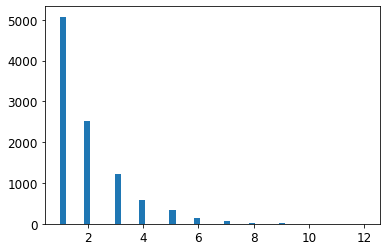

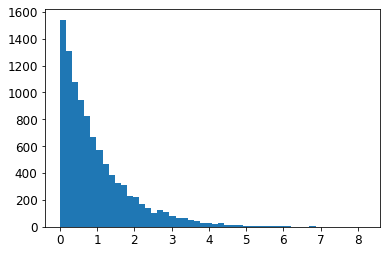

In [122]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# 2.10 연습문제

### 1. 서포트 벡터 머신 회귀(sklearn.svm.SVR)를 kernel = 'linear'(하이퍼파라미터 C를 바꿔가며)나 kernel = 'rbf'(하이퍼파라미터 C와 gamma를 바꿔가며)등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경쓰지 마세요. 최상의 SVR모델은 무엇인가요?

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

params_grid = [
    {'kernel' : ['linear'], 'C' : [10., 30., 100., 300., 1000., 3000., 10000., 
                                   30000.0]},
    {'kernel' : ['rbf'], 'C' : [1.0, 3.0, 10., 30., 100., 300., 1000.0],
    'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, params_grid, cv = 5, 
                           scoring = 'neg_mean_squared_error', verbose = 2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   3.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   3.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   3.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   3.8s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   6.4s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] .

[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .

[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   6.2s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=   6.0s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] .

[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   6.0s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   6.0s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   6.0s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   6.0s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   5.9s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   5.9s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=   5.9s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 24.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

최상 모델의 5-폴드 교차 검증으로 평가한 점수는 아래와 같다.

In [124]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70543.07617333507

<code>RandomForestRegressor</code>보다 훨씬 좋지 않다. 최상의 하이퍼파라미터를 확인해 본다.

In [125]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

선형 커널이 RBF커널보다 성능이 더 나은 것 같다. <code>C</code>는 테스트한 것 중에 최대값이 선택되었다. 따라서 작은 값들은 지우고 더 큰 값의 <code>C</code>로 격자 탐색을 다시 실행해 보아야 한다. 아마도 더 큰 값의 <code>C</code>에서 성능이 높아질 것이다.

### 2. GridSearchCV를 RandomiszedSearchCV로 바꿔보세요.

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# kernel 매개변수가 'linear'일 때는 gamma가 무시된다.
params_distribs = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20, 200000),
    'gamma' : expon(scale = 1.0)
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions = params_distribs,
                               n_iter = 50, cv = 5, scoring = 'neg_mean_squared_error',
                               verbose = 2, random_state = 42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   3.8s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   3.8s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   3.8s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   3.9s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=   3.9s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   7.8s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   7.5s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   7.6s
[CV] C=26290.2

[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  23.1s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  26.1s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  23.9s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  26.9s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  29.1s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   4.6s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=   4.6

[CV]  C=761.4316758498783, gamma=2.6126336514161914, kernel=linear, total=   3.8s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  16.6s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  16.9s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  15.2s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  16.3s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  16.2s
[CV] C=2423.0759984939164, gamma=3.248614270240346, kernel=linear ....
[CV]  C=2423.0759984939164, gamma=3.248614270240346, kernel=linear, total=   

[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  13.2s
[CV] C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf .......
[CV]  C=56681.80859029545, gamma=0.9763011917123741, kernel=rbf, total=  14.0s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   6.1s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   6.0s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   6.1s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   6.0s
[CV] C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf .......
[CV]  C=48.15822390928914, gamma=0.4633351167983427, kernel=rbf, total=   6.1s
[CV] C=399.7268155705

[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   3.8s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   3.8s
[CV] C=129.8000604143307, gamma=2.8621383676481322, kernel=linear ....
[CV]  C=129.8000604143307, gamma=2.8621383676481322, kernel=linear, total=   3.7s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   6.1s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   6.0s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   6.1s
[CV] C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf ......
[CV]  C=288.4269299593897, gamma=0.17580835850006285, kernel=rbf, total=   6.0s
[CV] C=2

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 35.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001521D1079B0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001521D107C18>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

최상 모델의 5-폴드 교차 검증으로 평가한 점수는 아래와 같다.

In [127]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54452.9965246199

이제 <code>RandomForestRegressor</code>의 성능에 훨씬 가까워졌지만 아직 차이가 난다. 최상의 하이퍼파라미터를 확인해 본다.

In [128]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

이번에는 RBF커널에 대해 최적의 하이퍼파라미터 조합을 찾아본다. 보통 임의탐색 같은 시간안에 격자탐색보다 더 좋은 하이퍼파라미터를 찾는다.  

여기서 사용된 <code>scale = 1.0</code>인 지수 분포를 살펴본다. 일부 샘플은 1.0보다 아주 크거나 작다. 하지만 로그 분포를 보면 대부분의 값이 exp(-2)와 exp(2), 즉 0.1과 7.4사이에 집중되어 있음을 알 수 있다.

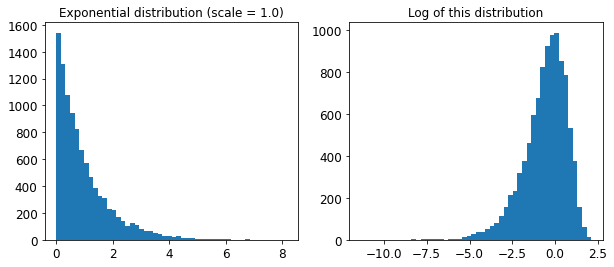

In [129]:
expon_distrib = expon(scale = 1.)
samples = expon_distrib.rvs(10000, random_state = 42)
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.title('Exponential distribution (scale = 1.0)')
plt.hist(samples, bins = 50)
plt.subplot(122)
plt.title('Log of this distribution')
plt.hist(np.log(samples), bins = 50)
plt.show()

<code>C</code>에 사용된 분포는 매우 다르다. 주어진 범위안에서 균등 분포로 샘플링된다. 그래서 오른쪽 로그 분포가 거의 일정하게 나타난다. 이런 분포는 원하는 스케일이 정확히 무엇인지 모를 때 사용하면 좋다.

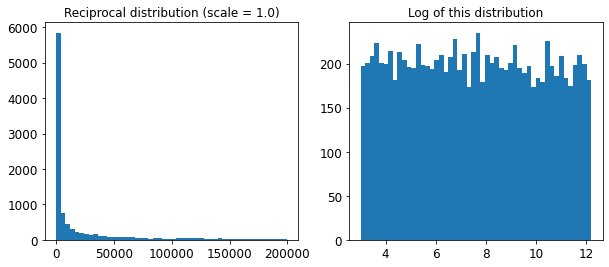

In [130]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state = 42)
plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.title('Reciprocal distribution (scale = 1.0)')
plt.hist(samples, bins = 50)
plt.subplot(122)
plt.title('Log of this distribution')
plt.hist(np.log(samples), bins = 50)
plt.show()

<code>reciprocal</code>함수는 하이퍼파라미터의 스케일에 대해 전혀 감을 잡을 수 없을 때 사용한다(오른쪽 그래프에서 볼 수 있듯이 주어진 범위안에서 모든 값이 균등하다). 반면 지수 분포는 하이퍼파라미터의 스케일을 어느정도 알고 있을 때 사용하는 것이 좋다.

### 3. 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가해 보세요.

In [131]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, X, y = None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

위의 특성 선택 클래스는 이미 어떤 식으로든 특성 중요도를 계산했다고 가정한다. 가령 <code>RandomForestRegressor</code>을 사용하여 <code>TopFeatureSelector</code>의 <code>fit()</code>메서드에서 직접 계산할 수도 있지만(캐싱을 사용하지 않는 경우) 격자탐색이나 랜덤탐색의 모든 하이퍼파라미터 조합에 대해 계산이 일어나기 때문에 매우 느려진다.

선택할 특성의 개수 지정한다.

In [132]:
k = 5

최상의 k개 특성의 인덱스를 확인해 본다.

In [133]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  8,  9, 12], dtype=int64)

In [134]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [135]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'rooms_per_hhold', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

최상의 k개 특성이 맞는지 다시 확인한다.

In [136]:
sorted(zip(feature_importances, attributes), reverse = True)[:k]

[(0.33736680039085787, 'median_income'),
 (0.16094322014622367, 'INLAND'),
 (0.10041429434204395, 'pop_per_hhold'),
 (0.0839908398412117, 'longitude'),
 (0.0809434989448318, 'rooms_per_hhold')]

이제 이전에 정의한 주니 파이프라인과 특성 선택기를 추가한 새로운 파이프라인을 만든다.

In [137]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [138]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

처음 3개 샘플의 특성을 확인해 본다.

In [139]:
housing_prepared_top_k_features[0:3]

array([[ 0.6095637 , -0.33266751, -0.13483487, -0.05882111,  0.        ],
       [ 0.59459102,  2.46343219,  0.13363754, -0.09944349,  0.        ],
       [ 0.82417203,  3.84039697,  1.18967375, -0.08514871,  0.        ]])

최상의 k개 특성이 맞는지 다시 확인한다.

In [140]:
housing_prepared[0:3, top_k_feature_indices]

array([[ 0.6095637 , -0.33266751, -0.13483487, -0.05882111,  0.        ],
       [ 0.59459102,  2.46343219,  0.13363754, -0.09944349,  0.        ],
       [ 0.82417203,  3.84039697,  1.18967375, -0.08514871,  0.        ]])

### 4. 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어 보세요.

In [141]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [142]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

몇 개의 샘플을 전체 파이프라인을 적용해 본다.

In [143]:
some_data = housing.iloc[:4]
some_labels = housing_labels[:4]

print('Predictions : \t', prepare_select_and_predict_pipeline.predict(some_data))
print('Labels : \t', list(some_labels))

Predictions : 	 [222210.80120002 521185.70442344 505892.10014054 186439.89154172]
Labels : 	 [226900.0, 500001.0, 500001.0, 245400.0]


전체 파이프라인이 잘 작동하는 것 같다. 물론 예측 성능이 아주 좋지는 않다. <code>SVR</code>보다 <code>RandomForestRegressor</code>가 더 나은 것 같다.

### 5. GridSearchCV를 사용해 준비 단계의 옵션을 자동으로 탐색해 보세요.

In [144]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, 
                                cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.3s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.3s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   4.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   4.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   4.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__

[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=   4.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=   4.9s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=   4.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=   4.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=   5.0s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=   4.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=

[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=   6.0s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=   5.8s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=   6.3s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   6.8s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   6.7s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   7.1s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature

[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  11.3s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  11.7s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  13.4s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  14.8s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  12.6s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  12.2s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, p

[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  14.3s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  16.0s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  15.6s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  15.9s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  13.5s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  14.5s
[CV] feature_selection__k=14, preparation__num__impute

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 36.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                     

In [145]:
grid_search_prep.best_params_

{'feature_selection__k': 11,
 'preparation__num__imputer__strategy': 'most_frequent'}

최상의 <code>Imputer</code>정책은 <code>most_frequent</code>이고 거의 모든 특성이 유용하다(16개 중 15개). 마지막 특성(<code>ISLAND</code>)은 잡음이 추가될 뿐이다.